## 1. Defining the Question

### a) Specifying the Data Analysis Question

What are the factors that determine the number of children born to a woman of reproductive age in Kenya?

### b) Defining the Metric for Success

This project will be a success when we are able to carry out data analysis to gain insights that answer the research question.

### c) Understanding the context 

The Demographic and Health Surveys (DHS) Program has collected, analyzed, and disseminated accurate and representative data on population, health, HIV, and nutrition through more than 400 surveys in over 90 countries.

As a Data professional you are tasked to determine the main factors that can help determine the number of total children ever born by a woman of reproductive age in Kenya. You are provided with the Kenya Demographics Health Survey (KDHS 2014) data set.

### d) Recording the Experimental Design
1. Load libraries
2. Load dataset with the following variables:
    * CASEID : Unique Case identifier
    * V010 : Respondents Year of Birth
    * V012 : Respondents current age
    * V025 : Type of residence
    * V024 : Region
    * V106 : Highest level of education
    * V152 : Age of household head
    * V201 : Total children ever born
3. Answer the deliverables outlined below
4. Summarize findings.

**Deliverables:**
* Input the dataset provided and display the head(5) of the dataset with the above variables of interest only.
* Calculate the mean, median and mode for V012 , V152 and V201. Would you prefer mean or median for V201?
* Calculate the Range, IQR and standard deviation for V012 and V152. Comment on variability of the variables.
* Plot a histogram of V012 and V152 and explain the skewness.
* Create a frequency table for V024 and V106 then plot a barchart for the two variables.
* Create a boxplot of V201 by (V025, V106, V024) separately.
* Create a scatter plot and compute the Pearson Correlation Coefficient between V201 and V012 explaining your findings.





### e) Data Relevance

While this data set provided the information necessary to answer the research question, it could benefit from having more data, such as the income level of the respondents, their marital status, and so on.

## 2. Data Cleaning & Analysis

In [ ]:
# loading libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the main data set
# kdhs2014 = pd.read_csv('kdhs2014_childfile.csv')
kdhs2014 = pd.read_csv('https://bit.ly/khds_dataset')
kdhs2014.head(5)

,Unnamed: 0,CASEID,MIDX,V000,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,V013,V014,V015,V016,V017,V018,V019,V019A,V020,V021,V022,V023,V024,V025,V026,V027,V028,V029,V030,V031,V032,V034,V040,V042,...,SYPN1,SPN2,SDPN2,SMPN2,SYPN2,SPN3,SDPN3,SMPN3,SYPN3,SRV1,SDRV1,SMRV1,SYRV1,SRV2,SDRV2,SMRV2,SYRV2,SYF,SDYF,SMYF,SYYF,SAMZ,SDAMZ,SMAMZ,SYAMZ,S521BA,S521BB,S521BC,S521BD,S521BE,S521BX,S539AA,S539AB,S539AC,S539AD,S539AE,S539AF,S539AG,S539AY,S522C
0,1,0001019 02,1,KE6,1,19,2,1,5476381,8,2014,1376,8,1991,1100,23,20-24,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,178,7,175,177,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0001019 03,1,KE6,1,19,3,1,5476381,8,2014,1376,2,1991,1094,23,20-24,Month and year - information complete,Completed,31,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,3,178,7,175,177,6.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0001033 02,1,KE6,1,33,2,1,5476381,8,2014,1376,8,1988,1064,26,25-29,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,179,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0001033 02,2,KE6,1,33,2,1,5476381,8,2014,1376,8,1988,1064,26,25-29,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,179,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0001037 02,1,KE6,1,37,2,1,5476381,8,2014,1376,2,1992,1106,22,20-24,Month and year - information complete,Completed,19,1309,13,68,2,All woman sample,1,1,1,Nairobi,Urban,NaN,1,178,7,175,177,6.0,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# selecting only the relevant columns
df = kdhs2014[['CASEID', 'V010', 'V012', 'V025', 'V024', 'V106', 'V152', 'V201']]
df.head()

,CASEID,V010,V012,V025,V024,V106,V152,V201
0,0001019 02,1991,23,Urban,Nairobi,Secondary,52.0,2
1,0001019 03,1991,23,Urban,Nairobi,Secondary,52.0,1
2,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
3,0001033 02,1988,26,Urban,Nairobi,Secondary,27.0,2
4,0001037 02,1992,22,Urban,Nairobi,Primary,29.0,3


In [ ]:
# # finding and dealing with null values

df.isna().sum()

# Calculating the rounded mean of the V152 column to add it as a missing value
V152_mean = df['V152'].mean()
V152_mean = round(V152_mean, 0)
V152_mean

# Filling the missing value with the rounded mean
df["V152"].fillna(V152_mean, inplace=True)

# # Checking if the rounded mean was inserted as a missing value
df[3765:3769]

,CASEID,V010,V012,V025,V024,V106,V152,V201
3765,0358051 02,1971,43,Rural,Coast,No education,44.0,12
3766,0359001 02,1988,26,Rural,Coast,Secondary,30.0,2
3767,0359001 02,1988,26,Rural,Coast,Secondary,30.0,2
3768,0359009 02,1981,32,Rural,Coast,Primary,38.0,4


In [ ]:
# Converting the values of column V152 into integer data type from float
# as this the an age column
df['V152']=df['V152'].astype(int)

df.dtypes

CASEID    object
V010       int64
V012       int64
V025      object
V024      object
V106      object
V152       int64
V201       int64
dtype: object

In [ ]:
# dropping duplicates, if any
# Checking the duplicate rows
duplicates_df = df[df.duplicated()]
print(duplicates_df)

# Dropping the duplicates
df = df.drop_duplicates()

df.duplicated().any()

                CASEID  V010  V012   V025     V024          V106  V152  V201
3           0001033 02  1988    26  Urban  Nairobi     Secondary    27     2
5           0001037 02  1992    22  Urban  Nairobi       Primary    29     3
8           0001059 02  1992    21  Urban  Nairobi     Secondary    22     3
9           0001059 02  1992    21  Urban  Nairobi     Secondary    22     3
17          0002016 02  1990    24  Urban  Nairobi     Secondary    31     2
...                ...   ...   ...    ...      ...           ...   ...   ...
20951       1611139 04  1988    25  Urban  Western        Higher    57     2
20955       1612008 02  1987    26  Urban  Western        Higher    28     2
20957       1612015 02  1989    25  Urban  Western       Primary    24     3
20959       1612041 02  1988    25  Urban  Western       Primary    28     2
20963       1612134 02  1972    41  Urban  Western  No education    45    10

[6015 rows x 8 columns]


False

In [ ]:
# checking for the shape of the dataset
df.shape

(14949, 8)

In [ ]:
# calculating the mean, median, and mode of the V012 variable

# Calculating the mean
V012_mean_df = df['V012'].mean()
V012_mean_df

# Calculating the mode
V012_mode_df = df['V012'].mode().iloc[0]
V012_mode_df

# Calculating the median
V012_median_df = df['V012'].median()
V012_median_df

print("The mean for the variable V012 is:" ,V012_mean_df, "\nThe modal value for the variable V012 is:" ,V012_mode_df, "\nThe median for the variable V012 is:", V012_median_df)

The mean for the variable V012 is: 28.878988561107768 
The modal value for the variable V012 is: 25 
The median for the variable V012 is: 28.0


In [ ]:
# calculating the mean, median, and mode of the V152 variable

# Caclculating the mean for V152 variable
V152_mean_df = df['V152'].mean()
V152_mean_df

# Calculating the mode for the V152 variable/column
V152_mode_df = df['V152'].mode().iloc[0]
V152_mode_df

# Calculating the median value for the variable V152
V152_median_df = df['V152'].median()
V152_median_df

print("The mean for the variable V152 is:" ,V152_mean_df, "\nThe modal value for the variable V012 is:" ,V152_mode_df, "\nThe median for the variable V012 is:", V152_median_df)

The mean for the variable V152 is: 38.339888955782996 
The modal value for the variable V012 is: 30 
The median for the variable V012 is: 35.0


In [ ]:
# calculating the mean, median, and mode of the V201 variable

# Calculating the mean for V201 variable
V201_mean_df = df['V201'].mean()
V201_mean_df

# Calculating the mode for the variable V201
V201_mode_df = df['V201'].mode().iloc[0]
V201_mode_df

# Claculating the median for the variable V201
V201_median_df = df['V201'].median()
V201_median_df

print("The mean for the variable V201 is:" ,V201_mean_df, "\nThe modal value for the variable V012 is:" ,V201_mode_df, "\nThe median for the variable V012 is:", V201_median_df)

The mean for the variable V201 is: 3.4759515686668006 
The modal value for the variable V012 is: 1 
The median for the variable V012 is: 3.0


I would prefer the median since it remains largely unaffected by the number of observations or by outliers.

In [ ]:
# calculating the range, IQR, and standard deviation of the V012 variable

# Calculating the range for the variable V012
V012_df_max = df['V012'].max()
V012_df_max

V012_df_min = df['V012'].min()
V012_df_min

# # We now calculate the range which is the largest value less the least value within the variable V012
V012_range = V012_df_max - V012_df_min
V012_range

# Calculating the IQR for the variable V012
V012_IQR = (df['V012'].quantile(0.75) - df['V012'].quantile(0.25))
# V012_IQR

# Calculating the standard deviation for the variable V012
V012_std_df = df['V012'].std()
V012_std_df

print("The range of the variable V012 is:", V012_range, "\n\nThe Interquartile Range is:", V012_IQR, "\n\nThe standard deviation is:", V012_std_df)

The range of the variable V012 is: 34 

The Interquartile Range is: 10.0 

The standard deviation is: 6.795209999264812


In [ ]:
# calculating the range, IQR, and standard deviation of the V152 variable

V152_max_df = df['V152'].max()
V152_max_df

V152_min_df = df['V152'].min()
V152_min_df

# # We now calculate the range which is the largest value less the least value within the variable V012
V152_range = V152_max_df - V152_min_df
V152_range

# Calculating the IQR for the variable V012
V152_IQR_df = (df['V152'].quantile(0.75) - df['V152'].quantile(0.25))
V152_IQR_df

# # Calculating the standard deviation for the variable V012
V152_std_df = df['V152'].std()
V152_std_df

print("The range of the variable V152 is:", V152_range, "\n\nThe Interquartile Range is:", V152_IQR_df, "\n\nThe standard deviation is:", V152_std_df)

The range of the variable V152 is: 80 

The Interquartile Range is: 14.0 

The standard deviation is: 12.434054100701


The V152 variable has larger spread and variablity than the V012 variable.

In [ ]:
!pip install mplcyberpunk
  
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use("cyberpunk")
plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='v')
plt.plot([2, 3, 4, 3, 4, 5, 3], marker='s')
# Add glow effects-Optional
mplcyberpunk.add_glow_effects()
plt.show()

count    14949.000000
mean        28.878989
std          6.795210
min         15.000000
25%         24.000000
50%         28.000000
75%         34.000000
max         49.000000
Name: V012, dtype: float64

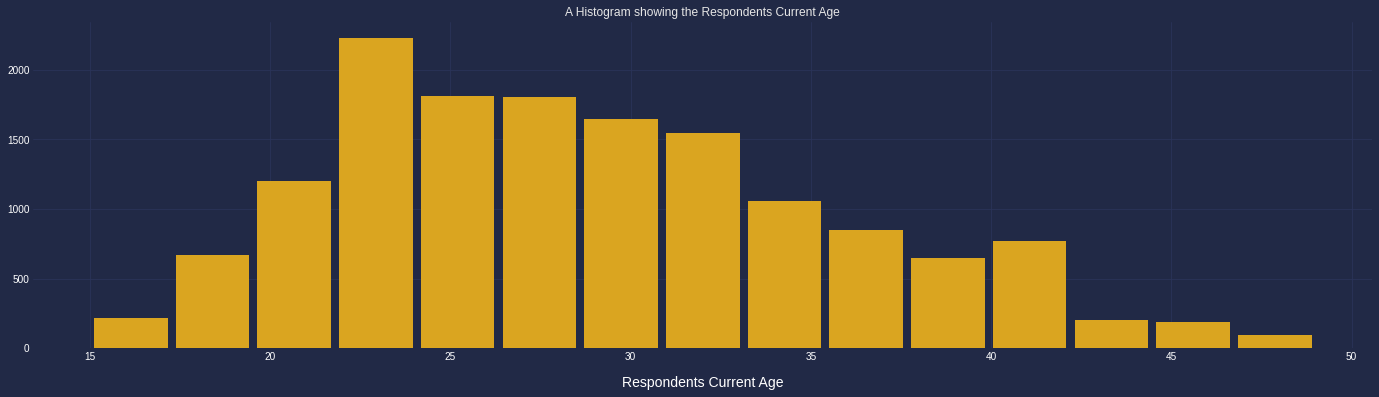

In [ ]:
# histogram of V012 variable

plt.figure(figsize=(24,6))
# plt.hist(df['V012'], bins=15, histtype='bar', rwidth=0.9, color='goldenrod')
df['V012'].hist(color = 'goldenrod', bins = 15, rwidth  = 0.9)
plt.xticks(rotation = 0, color='white')
plt.yticks(rotation = 0, color='white')
plt.xlabel("Respondents Current Age", labelpad=14, fontsize=14, color='white')
plt.title("A Histogram showing the Respondents Current Age")

df['V012'].describe()

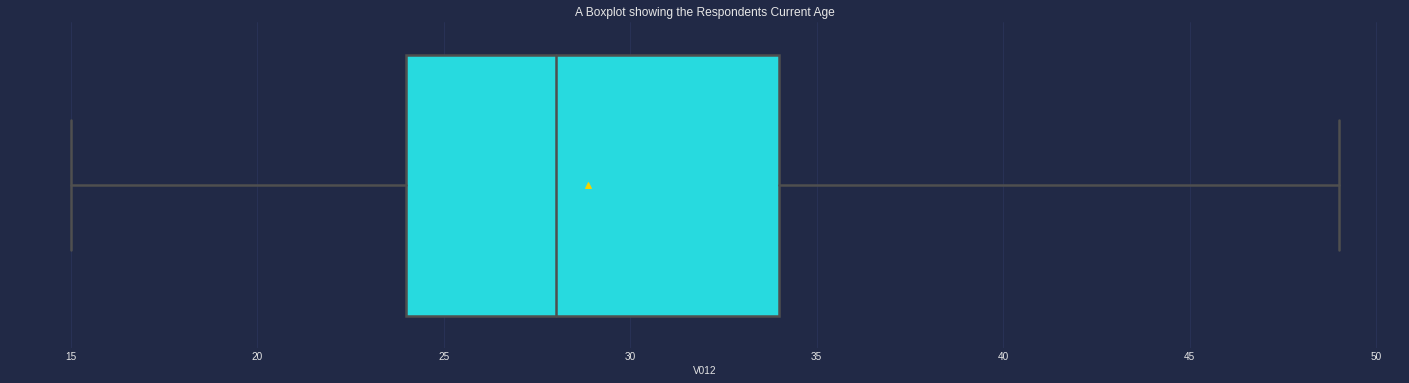

In [ ]:
plt.figure(figsize=(25,6))
sns.boxplot(df['V012'], showmeans = True, linewidth=2.5)
plt.title("A Boxplot showing the Respondents Current Age")
plt.show()

count    14949.000000
mean        38.339889
std         12.434054
min         15.000000
25%         30.000000
50%         35.000000
75%         44.000000
max         95.000000
Name: V152, dtype: float64

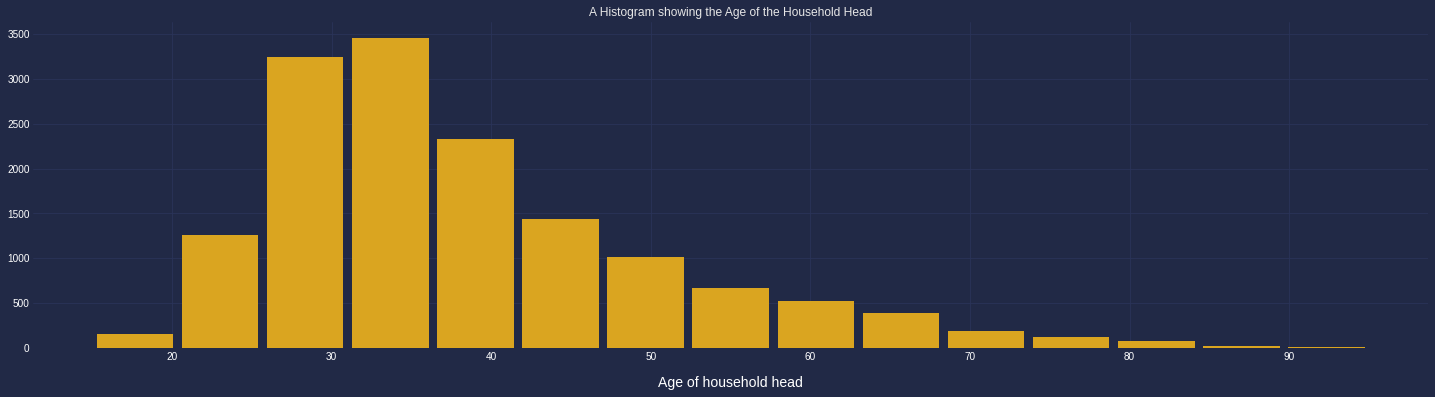

In [ ]:
# histogram of V152 variable

plt.figure(figsize=(25,6))
# plt.hist(df['V152'], bins=15, histtype='bar', rwidth=0.9, color='mediumvioletred')
df['V152'].hist(color = 'goldenrod', bins = 15, rwidth = 0.9)
plt.xticks(rotation=0, color='white')
plt.yticks(rotation=0, color='white')
plt.xlabel("Age of household head", labelpad=14, fontsize=14, color='white')
plt.title("A Histogram showing the Age of the Household Head")

df['V152'].describe()

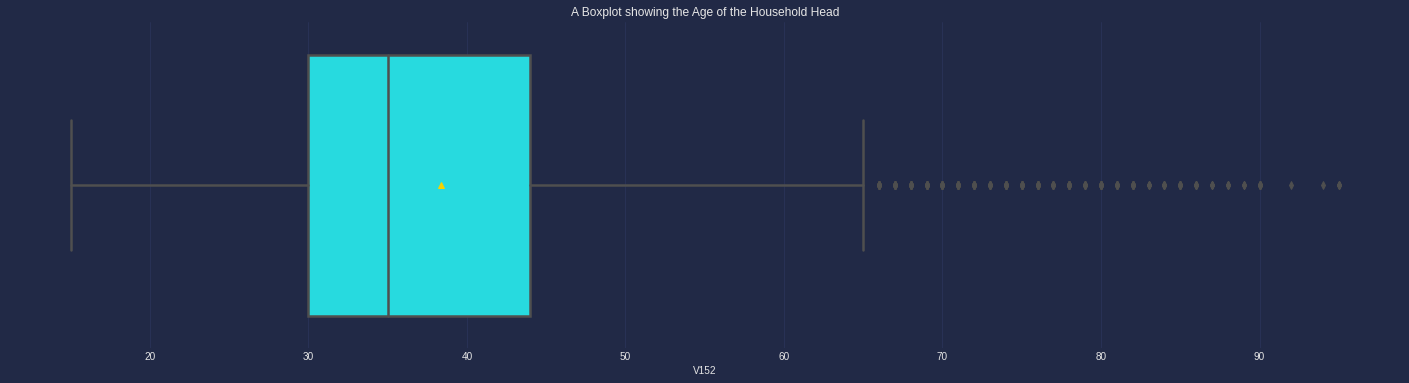

In [ ]:
plt.figure(figsize=(25,6))
sns.boxplot(df['V152'], showmeans = True, linewidth=2.5)
plt.title("A Boxplot showing the Age of the Household Head")
plt.show()

Both the V012 and V152 variables are skewed to the left (positively skewed), meaning there are more observations to the left of the mean and median.

In [ ]:
# displaying the frequency table of the V024 variable

df['V024'].value_counts()

Rift Valley      4760
Eastern          2299
Nyanza           2085
Coast            1857
Western          1398
Central          1197
North Eastern     925
Nairobi           428
Name: V024, dtype: int64

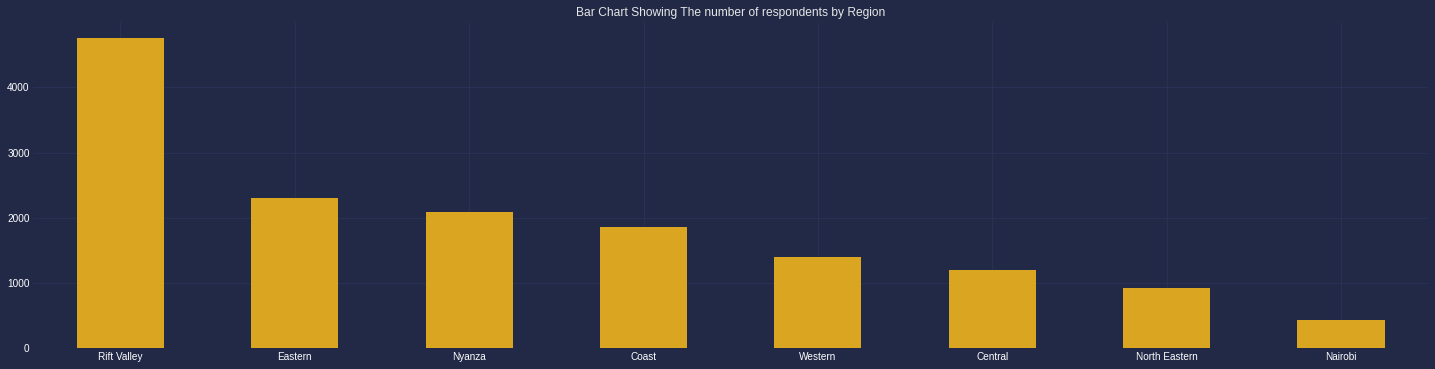

In [ ]:
# plotting the bar chart of the V024 frequency table

plt.figure(figsize=(25,6))
df['V024'].value_counts().plot(kind='bar', color='goldenrod')
plt.xticks(rotation=0, color='white')
plt.yticks(rotation=0, color='white')
plt.title("Bar Chart Showing The number of respondents by Region")
plt.show()

In [ ]:
# displaying the frequency table of the V106 variable

df['V106'].value_counts()

Primary         7843
Secondary       3210
No education    2790
Higher          1106
Name: V106, dtype: int64

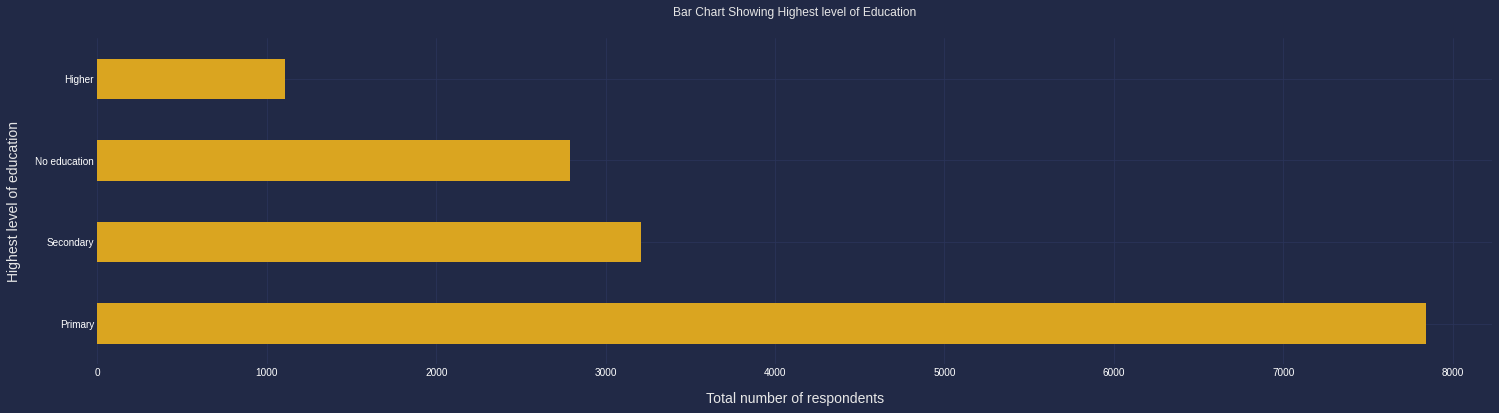

In [ ]:
# plotting the bar chart of the V106 frequency table

plt.figure(figsize=(25,6))


df['V106'].value_counts().plot(kind='barh', color='goldenrod')
plt.xticks(rotation=0, color='white')
plt.yticks(rotation=0, color='white')
plt.xlabel("Total number of respondents", labelpad=14, fontsize=14)
plt.ylabel("Highest level of education", labelpad=14, fontsize=14)
plt.title('Bar Chart Showing Highest level of Education', y=1.05)
plt.show()

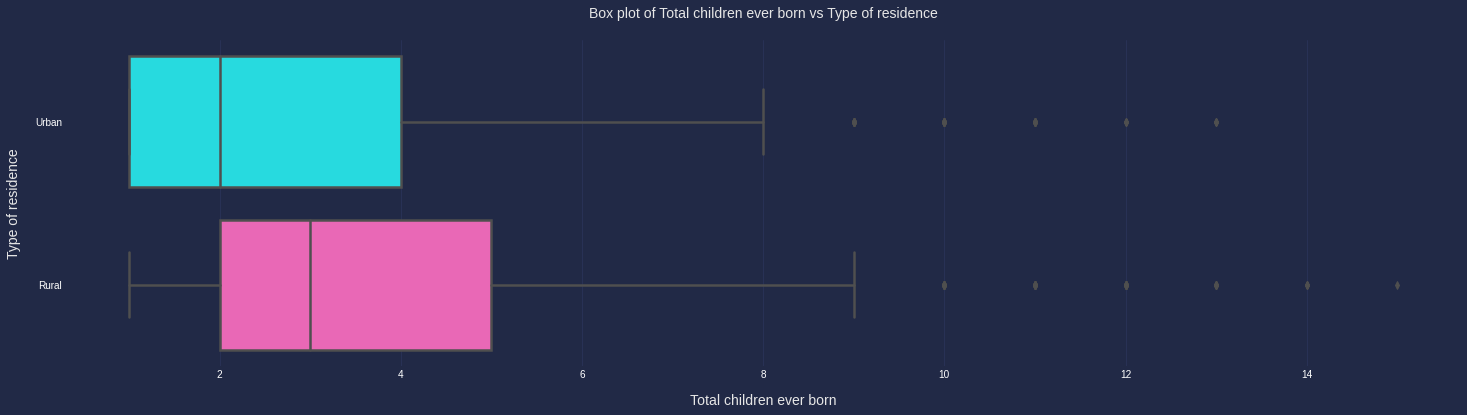

In [ ]:
# plotting a boxplot of V201 by V025

plt.figure(figsize=(25,6))

sns.boxplot(df['V201'], df['V025'], linewidth=2.5)
plt.title('Box plot of Total children ever born vs Type of residence', fontsize=14, y=1.05)
plt.xticks(rotation=0, color='white')
plt.yticks(rotation=0, color='white')
plt.ylabel('Type of residence', labelpad=14, fontsize=14)
plt.xlabel('Total children ever born', labelpad=14, fontsize=14)

plt.show()

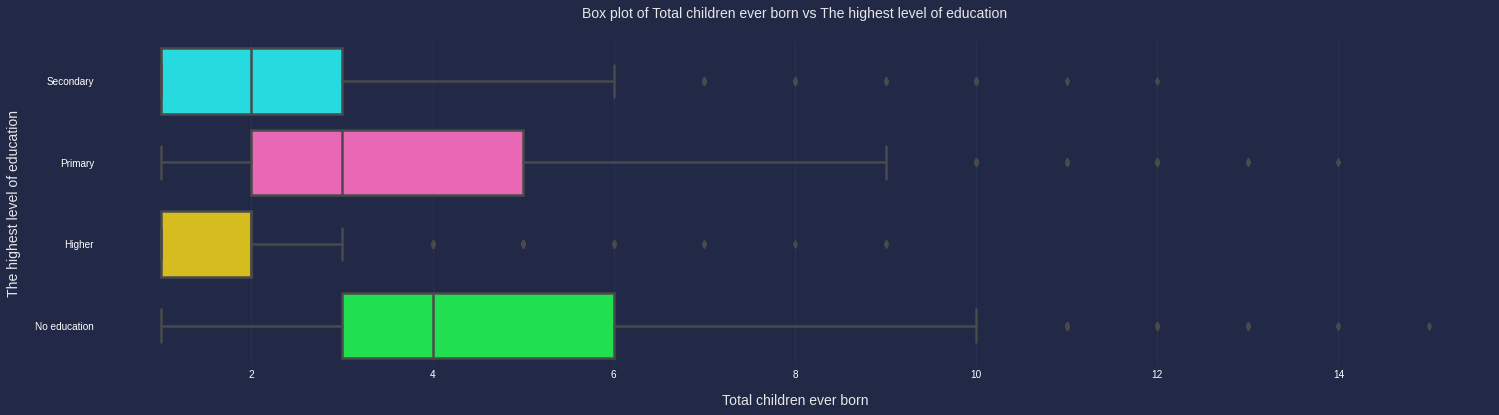

In [ ]:
# plotting a boxplot of V201 by V106

plt.figure(figsize=(25,6))
sns.boxplot(df['V201'], df['V106'], linewidth=2.5)
plt.title('Box plot of Total children ever born vs The highest level of education', fontsize=14, y=1.05)
plt.xticks(rotation=0, color='white')
plt.yticks(rotation=0, color='white')
plt.xlabel('Total children ever born', labelpad=14, fontsize=14)
plt.ylabel('The highest level of education', labelpad=14, fontsize=14)

plt.show()

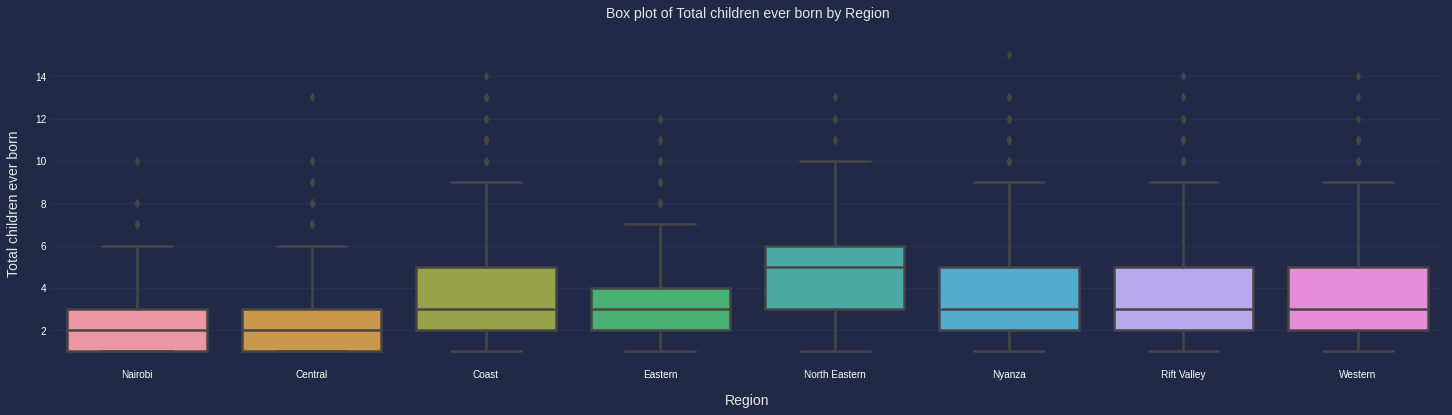

In [ ]:
# plotting a boxplot of V201 by V024

# plt.figure(figsize=(11,8))
# sns.boxplot(df['V201'], df['V024'], color = 'darkorchid')
# plt.title('Box plot of Total children ever born by Region', fontsize=14, y=1.05, color='white')
# plt.xticks(rotation=45, color='white')
# plt.yticks(rotation=45, color='white')

# plt.show()

plt.figure(figsize=(25,6))
sns.boxplot(df['V024'], df['V201'], linewidth=2.5)
plt.title('Box plot of Total children ever born by Region', fontsize=14, y=1.05)
plt.xticks(rotation=0, color='white')
plt.yticks(rotation=0, color='white')
plt.xlabel('Region', labelpad=14, fontsize=14)
plt.ylabel('Total children ever born', labelpad=14, fontsize=14)

plt.show()

<Figure size 1800x432 with 0 Axes>

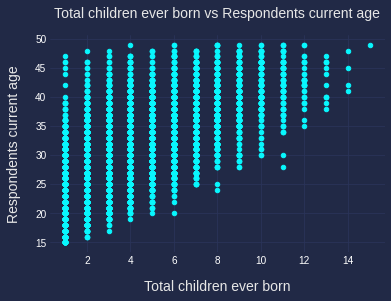

In [ ]:
# scatter plot of V201 by V012

plt.figure(figsize=(25,6))
df.plot(kind = 'scatter' , x='V201', y='V012')
plt.title("Total children ever born vs Respondents current age", fontsize=14, y=1.05)
plt.xticks(rotation=0, color='white')
plt.yticks(rotation=0, color='white')
plt.ylabel("Respondents current age", labelpad=14, fontsize=14)
plt.xlabel("Total children ever born", labelpad=14, fontsize=14)

plt.show()


In [ ]:
# previewing the correlation between the V201 and the V012 variables

V201_V012_coeff = df['V201'].corr(df['V012'], method="pearson")
V201_V012_coeff

0.7104720955348267

We see that there is a strong correlation between the V201 variable (Total Children Born) and the V012 variable (Respondent's Current Age), implying that the older the age, the more number of children you can find.

## 3. Summary of Findings

- Majority of the respondents are below 35 years of age.
- Majority of Household Heads are below 50 years of age.
- Majority of the respondents are from the Rift Valley region while the least are from Nairobi.
- Most of the respondents have attained Primary level of education as their highest level of education. Those with education levels beyond secondary school make up the minority.
- More children are born in rural areas than in urban areas.
- More children are born to mothers with no education.
- Nyanza Region leads in terms of total children born. Nairobi Region is the last.
- More children are born to older women than to younger women.